In [527]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [594]:
m = 4
sigma = 10
n = 100
power_coeffs = np.arange(m)
V = 0
v = np.zeros(m)
T = np.zeros((m,m))
x_left = 0
x_right = 0

def update_info(x_i, y_i):
    global n, V, v, T, power_coeffs
    n=n+1
    V+=(y_i**2)
    tmp_arr = np.power(np.repeat(x_i,m), power_coeffs)
    v = v+(tmp_arr*y_i)
    T = T+np.dot((tmp_arr)[:, None], (tmp_arr)[None, :])    

def func(x_i):
    global m, power_coeffs, T, v
    return (((np.power(np.repeat(x_i,m), power_coeffs)).dot(np.linalg.inv(T))).dot(v))

def dfx(x):
    fx = (np.power(np.repeat(x,m), power_coeffs))
    return (sigma*(fx.dot(np.linalg.inv(T))).dot(fx.T))

def ddfx(x):
    global V, v, T, n, m, F
    fx = (np.power(np.repeat(x,m), power_coeffs))
    return (
    ((V-((v[None, :]).dot(np.linalg.inv(T)).dot(v[:, None])))/(n-m))*
    ((fx.dot(np.linalg.inv(T))).dot(fx[:, None]))
    )
def calc():
    global m,n, sigma, power_coeffs, V, v, T
    print (n)
    coeffs = np.array([1,-1,2,1])
    x = (x_right-x_left)*np.random.random_sample(n)+(x_left)

    epsilon = np.random.normal(0, sigma,n )
    

    y = np.polyval(coeffs[::-1],x)+epsilon

    #Canonical information
    n = 0
    for x_i, y_i in zip(x, y):
        update_info(x_i, y_i)

    x_data = np.linspace(x_left, x_right)
    y_data = []
    y_data_dfx = []
    y_data_ddfx = []
    y_data_real = np.polyval(coeffs[::-1],x_data)
    for dat in x_data:
        y_data.append(func(dat))
        y_data_dfx.append(dfx(dat))
        y_data_ddfx.append(math.sqrt(ddfx(dat)[0][0]))

    y_data = np.array(y_data)
    y_data_dfx = np.array(y_data_dfx)
    y_data_ddfx = np.array(y_data_ddfx)
    y_data_dfx_down = y_data - y_data_dfx
    y_data_dfx_up = y_data + y_data_dfx
    y_data_ddfx_down = y_data - y_data_ddfx
    y_data_ddfx_up = y_data+y_data_ddfx

    plt.plot(x_data, y_data, 'C1', label= 'est. f')
    plt.plot(x_data, y_data_dfx_down, 'C2')
    plt.plot(x_data, y_data_dfx_up, 'C2', label = 'Error')
    plt.plot(x_data, y_data_real, 'C0', label = 'f')
    plt.plot(x_data, y_data_ddfx_down, 'r--', label = 'Est. error')
    plt.plot(x_data, y_data_ddfx_up, 'r--')
    plt.plot(x, y, 'bs')
    plt.title('n='+str(n))
    plt.legend()
    plt.show()



10


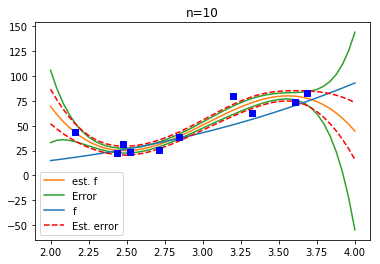

In [595]:
n = 10
x_left = 2
x_right = 4
calc()


20


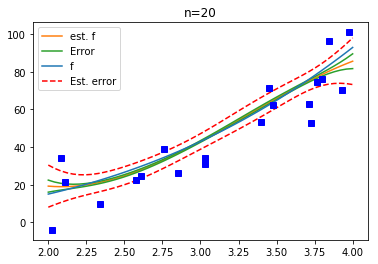

In [597]:
n = 20
x_left = 2
x_right = 4
calc()


100


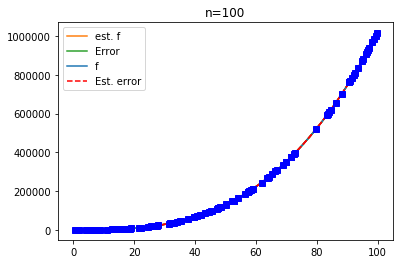

In [598]:
n = 100
x_left = 0
x_right = 100
calc()
